# Chapter Three - Simulating the Reed-Frost model

The Reed-Frost model assumes that there exists a closed population of $N$ individuals, and these individuals are assigned to disease states: susceptible, infected, removed. 
Every individual in the system comes into contact with every other individual at each time steps $\Delta t$.
At the start of the system, we assume that there are $s_{0}$ susceptibles, $i_{0}$ infectors, and $r_{0}$ removed. We also assume that when an infector comes in contact with a susceptible that they transfer the pathogen with probability $p$. 

This means that, for the Reed-Frost model, we need to keep track of the number of susceptible, infected, and removed individuals over time. 
There are many ways to do this. 
Below, we will keep track of individuals using three lists. 
List $s$ counts the number of susceptibles, list $i$ counts the number of infectors, and list $r$ counts the number of removed.  

In [47]:
#--initial conditions
s0 = 100
i0 = 1
r0 = 0

#--probability of transmission
p=0.015

#--create three lists and add the initial number of s,i,r to each list. 
s = [s0]
i = [i0]
r = [r0]

Above, we created three variables to hold the initial conditions:
$s_{0}$,$i_{0}$,$r_{0}$. 
We also created three lists $s,i,r$ and added the initial conditions to them.
To these three lists we will append new counts of s,i,r at the following time step. 

From chapter one we saw that, for a single susceptible, the probability of infection at time $t+\Delta t$ was equal to 

$$ P(\text{infection}) = 1 - (1-p)^{i_{t}}$$

Lets create a function to compute this probability.
The inputs will be $p$, the probability that the pathogen infects a susceptible after contact with an infectors and $i_{t}$ the number of infectors in the system.  

In [48]:
def pr_inf(p,i):
    return 1 - (1-p)**i

Let $ P(\text{infection})$ be the probability of a "success" and the number of "trials" be the number of susceptibles in the system. 
Then the number of infectors at $t + \Delta t$ follows a binomial distribution. 

$$ I_{t+\Delta t} \sim \text{Binomial}(S_{t}, P(\text{infection})) $$

 We can use the numpy module to draw random numbers according to a Binomial distribution. 
 First we will import numpy and rename this module np.

In [49]:
import numpy as np

In the numpy module there is a submodule called random that contains a function for drawing random values according to a Binomial distribution. 

As an example, we can simulate 1000 values according to a Binomial(10,0.5) distribution and plot a histogram of the values.  

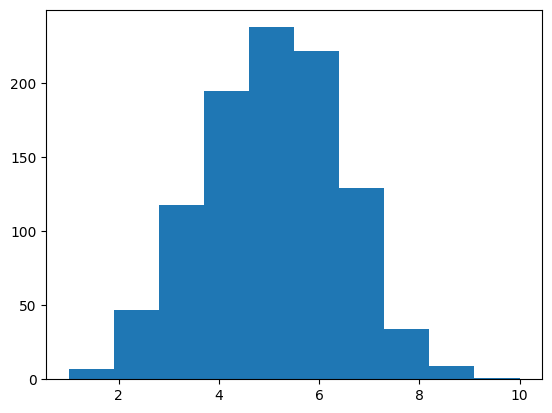

In [50]:
random_num_according_to_binom = np.random.binomial( n=10, p= 0.5, size=(1000,) )
plt.hist(random_num_according_to_binom)
plt.show()

We can use a random draw from the Binomial distribution to determine the number of infectors at time $t + \Delta t$. 

In [51]:
num_of_sus_at_time_t = s[-1] ## <- why? 
num_of_inf_at_time_t = i[-1] ## <- why? 

i__t_plusDelta = np.random.binomial( n=num_of_sus_at_time_t
                                    ,p=pr_inf(p,num_of_inf_at_time_t) )


Now that we know the number of infectors at the next time step---$i_{t_\Delta t}$---we can compute the number of susceptibles at the next time step and the number of removed at the next time step. 

In [52]:
s__t_plusDelta = num_of_sus_at_time_t-i__t_plusDelta #<-- why?
r__t_plusDelta = r[-1] + num_of_inf_at_time_t        #<-- why?

The final step is to run the above three steps over and over until the desired length of time. 
Lets set $t=0$, assume a time step $(\Delta t)$ equal to 1 week, and run the above model for 32 weeks. 

We can run a piece of code over and over using a for loop. 
A for loops contains two pieces: a list (at least one) to loop over and the (indented) code to repeat over and over.

In [53]:
start = 0
end   = 32
step  = 1

for t in np.arange(start,end,step): #<--Whats this function doing? 
    #--simulate the number of infectors at time t+delta
    num_of_sus_at_time_t = s[-1] ## <- why? 
    num_of_inf_at_time_t = i[-1] ## <- why? 
    
    i__t_plusDelta = np.random.binomial( n=num_of_sus_at_time_t
                                        ,p=pr_inf(p,num_of_inf_at_time_t) )
        
    #--compute the number of susceptibles at time t+delta
    s__t_plusDelta = num_of_sus_at_time_t-i__t_plusDelta

    #--compute the number of removed at time t+delta
    r__t_plusDelta = r[-1] + num_of_inf_at_time_t

    #--add the results to our lists. 
    s.append(s__t_plusDelta)
    i.append(i__t_plusDelta)
    r.append(r__t_plusDelta)

Now we have three lists: s,i,r that count the number of susceptible, infected, and removed individuals over 32 weeks. 
We can plot the number of infected as 

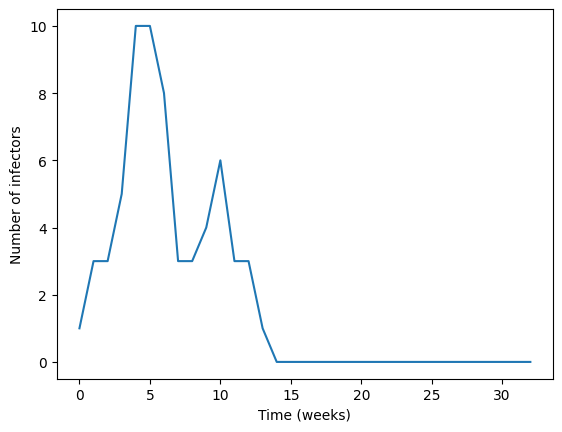

In [54]:
plt.plot(i)
plt.xlabel("Time (weeks)")
plt.ylabel("Number of infectors")
plt.show()

## Homework

1. Package the above Reed-Frost model into a single function.
   1. The function will take 8 inputs: $s0,i0,r0,N,p,start,end,step$
   2. The function will return a tuple of susceptibles, infectors, removeds
2. Run your packaged function 100 times
   1. With the following parameters s0=99,i0=1,r0=0,p=0.015,N=100,start=0,end=32,step=1
   2. For each of the 100 runs, plot the number of infectors  
      1. Label the horizontal and vertical axes.
      2. All plotted lines should be a single color.
      3. Set the transparency of each line to 0.25
3. From (2), please describe what you see. Why?
4. Set the parameter from (2) to be the same as 2.a. except p=0.009. Plot 100 lines.
5. From (4), please describe what you see. Why?